<a href="https://colab.research.google.com/github/Rishita32/Kaggle-Machine-Learning-Practice/blob/main/Regularization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, confusion_matrix

from google.colab import drive

In [ ]:
drive.mount('/content/drive', force_remount=True)
data=pd.read_csv('drive/MyDrive/Machine Learning Practice/datasets/Housing.csv')

Mounted at /content/drive


# EDA

In [ ]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
data.shape

(545, 13)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [ ]:
data.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


<ipython-input-7-b699050ce883>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True)


<Axes: >

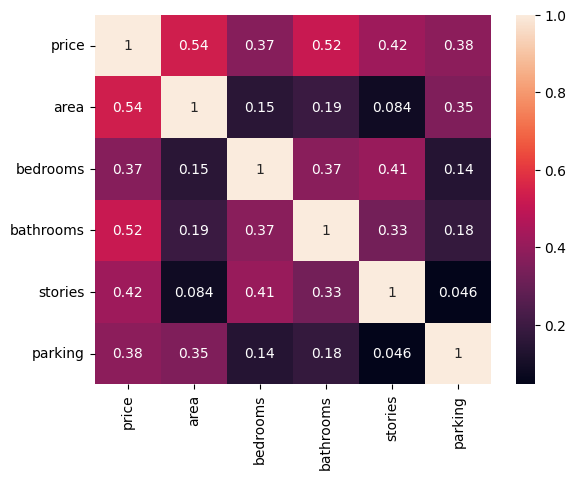

In [ ]:
sns.heatmap(data.corr(), annot=True)

In [ ]:
data.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [ ]:
data['airconditioning'].unique()

array(['yes', 'no'], dtype=object)

<Axes: xlabel='airconditioning', ylabel='price'>

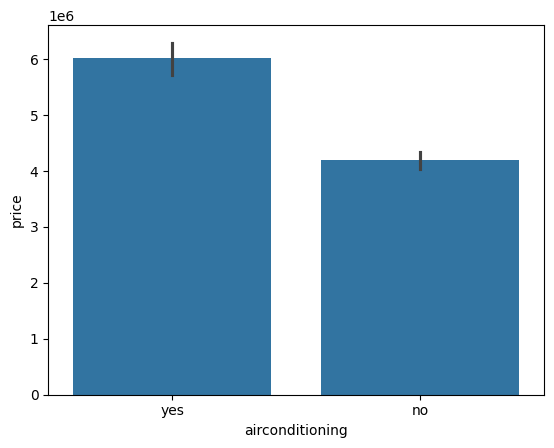

In [ ]:
sns.barplot(x='airconditioning', y='price', data=data)

<Axes: xlabel='mainroad', ylabel='price'>

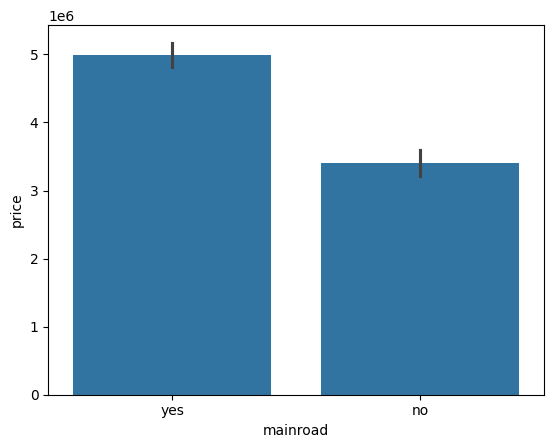

In [ ]:
sns.barplot(x='mainroad', y='price', data=data)

<Axes: xlabel='guestroom', ylabel='price'>

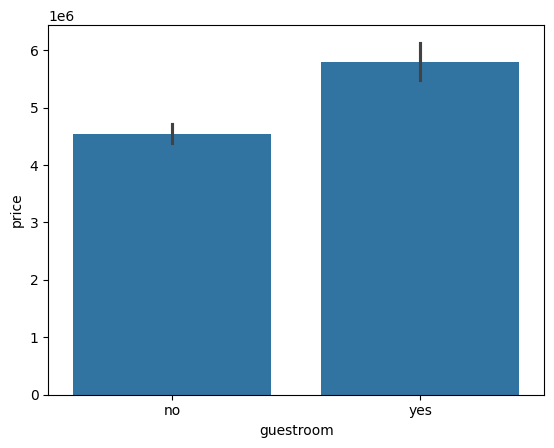

In [ ]:
sns.barplot(x='guestroom', y='price', data=data)

<Axes: xlabel='basement', ylabel='price'>

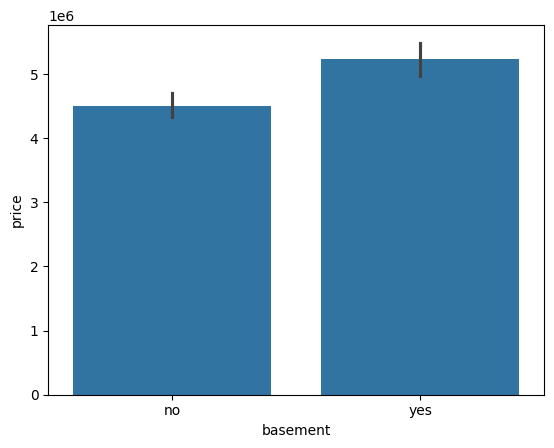

In [ ]:
sns.barplot(x='basement', y='price', data=data)

<Axes: xlabel='hotwaterheating', ylabel='price'>

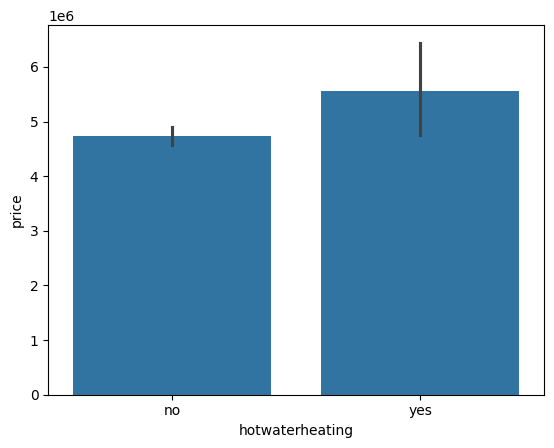

In [ ]:
sns.barplot(x='hotwaterheating', y='price', data=data)

<Axes: xlabel='furnishingstatus', ylabel='price'>

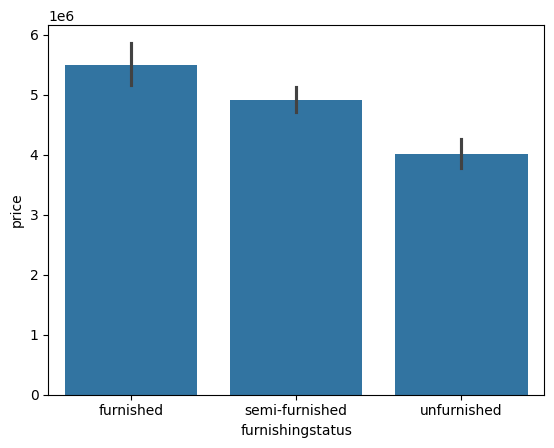

In [ ]:
sns.barplot(x='furnishingstatus', y='price', data=data)

<Axes: xlabel='prefarea', ylabel='price'>

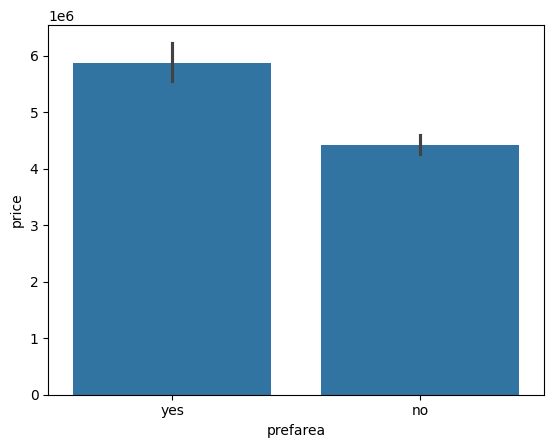

In [ ]:
sns.barplot(x='prefarea', y='price', data=data)

# Label Encoding

In [ ]:
categoricals=data.select_dtypes(['object'])
categoricals

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus
0,yes,no,no,no,yes,yes,furnished
1,yes,no,no,no,yes,no,furnished
2,yes,no,yes,no,no,yes,semi-furnished
3,yes,no,yes,no,yes,yes,furnished
4,yes,yes,yes,no,yes,no,furnished
...,...,...,...,...,...,...,...
540,yes,no,yes,no,no,no,unfurnished
541,no,no,no,no,no,no,semi-furnished
542,yes,no,no,no,no,no,unfurnished
543,no,no,no,no,no,no,furnished


In [ ]:
encode=LabelEncoder()
df_categorical_encode=categoricals.apply(encode.fit_transform)

In [ ]:
data=data.drop(categoricals.columns, axis=True)

In [ ]:
data=pd.concat([data, df_categorical_encode], axis=True)

In [ ]:
data.head()

,price,area,bedrooms,bathrooms,stories,parking,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus
0,13300000,7420,4,2,3,2,1,0,0,0,1,1,0
1,12250000,8960,4,4,4,3,1,0,0,0,1,0,0
2,12250000,9960,3,2,2,2,1,0,1,0,0,1,1
3,12215000,7500,4,2,2,3,1,0,1,0,1,1,0
4,11410000,7420,4,1,2,2,1,1,1,0,1,0,0


# Model Training

In [ ]:
X=data.drop('price', axis=1)
y=data['price']

In [ ]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2)

In [ ]:
from sklearn.linear_model import LinearRegression

model=LinearRegression()
model.fit(X_train, y_train)

y_pred=model.predict(X_test)

In [ ]:
model.score(X_train, y_train)

0.6873777066532019

In [ ]:
model.score(X_test, y_test)

0.6313132383570439

# Regularization

In [ ]:
from sklearn.linear_model import Lasso, Ridge

regu_model=Lasso(alpha=50, max_iter=100, tol=0.1)
regu_model.fit(X_train, y_train)

Lasso(alpha=50, max_iter=100, tol=0.1)

In [ ]:
y_pred_lasso=regu_model.predict(X_test)

In [ ]:
regu_model.score(X_test, y_test)

0.631283532810074

In this case there was no overfitting so we could not see a major change in the score after applying lasso regression.